In [30]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as  mcolors

In [31]:
class AdalineGD:
    """ADAptive LInear NEuron classfier
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Ramdon number generator seed for random weight
        initialization

    Attributes
    ----------
    w_ :1d-array
        Weights after fitting
    b_ : Scalar 
        Bias unit after fitting

    losses_ : list
        Mean squared generator loss function values in each epoch
    """
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_inter = n_inter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and n_features is the numbers of 
            features
        y : array- like, shape = [n_examples]
            Target values

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])

        self.b_ = np.float64(0.)
        print(self.b_ )
        self.losses_ = []

        for i in range(self.n_inter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors/X.shape[0])
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def activation(self, X):
        """Computet linear activation"""
        return X
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1,0)

In [32]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s

'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [33]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [34]:
#select setosa and versicolor
y = df.iloc[0:100,4].values

In [35]:
y = np.where(y == 'Iris-setosa', 0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
X = df.iloc[0:100, [0,2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

0.0
0.0


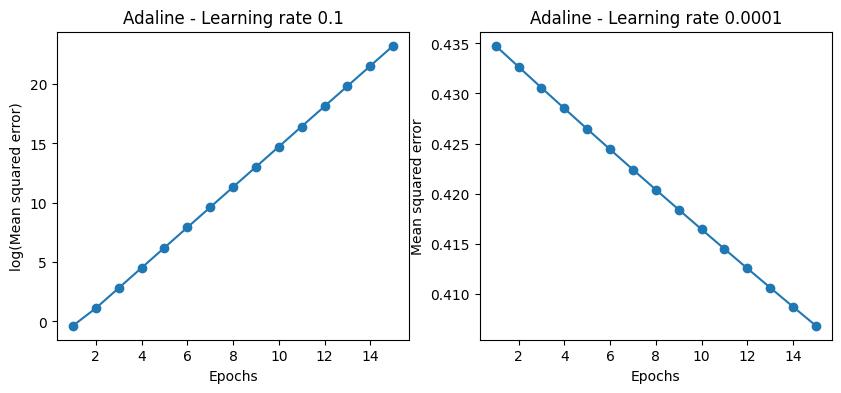

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_inter=15, eta=0.1).fit(X,y)
ax[0].plot( range(1, len(ada1.losses_) + 1 ), np.log10(ada1.losses_), marker='o' )
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')


ada2 = AdalineGD(n_inter=15, eta=0.00005).fit(X,y)
ax[1].plot( range(1, len(ada2.losses_) + 1 ), ada2.losses_, marker='o' )
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001');


In [38]:
X_std = np.copy(X)
X_std[:, 0].mean()

np.float64(5.471000000000001)

In [39]:
X_std[:, 0].std()

np.float64(0.6384817930058775)

In [40]:
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

In [41]:
def plot_desicion_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = mcolors.ListedColormap( colors[:len(np.unique(y))] )

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max,  resolution),  np.arange( x2_min, x2_max,  resolution))
    
    lab = classifier.predict( np.array([ xx1.ravel(),  xx2.ravel() ]).T )
    lab = lab.reshape(xx1.shape)
    plt.contourf( xx1, xx2, lab, alpha=0.3, cmap=cmap )
    plt.xlim( xx1.min(), xx1.max() )
    plt.ylim( xx2.min(), xx2.max() )

    # plot class examples

   
    print(np.unique(y))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter( x=X[ y == cl, 0 ], y=X[ y == cl, 1 ], alpha=0.8, c=colors[idx], marker=markers[idx], label=f"Class {cl}", edgecolor='black' )

0.0
[0 1]


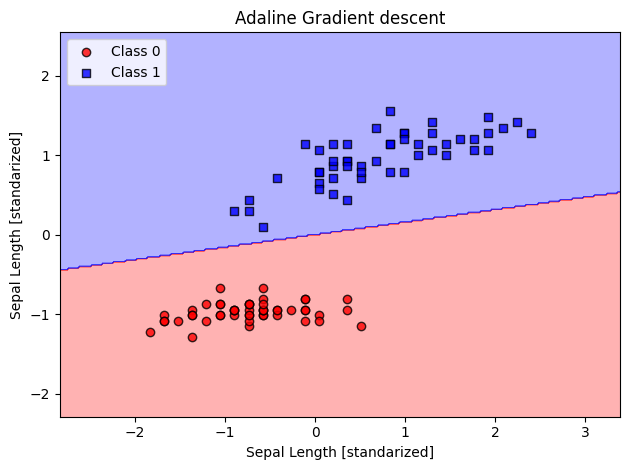

In [46]:
ada_gd = AdalineGD(eta=0.5, n_inter=20)
ada_gd.fit(X_std, y)
plot_desicion_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline Gradient descent')
plt.xlabel('Sepal Length [standarized]')
plt.ylabel('Sepal Length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout();

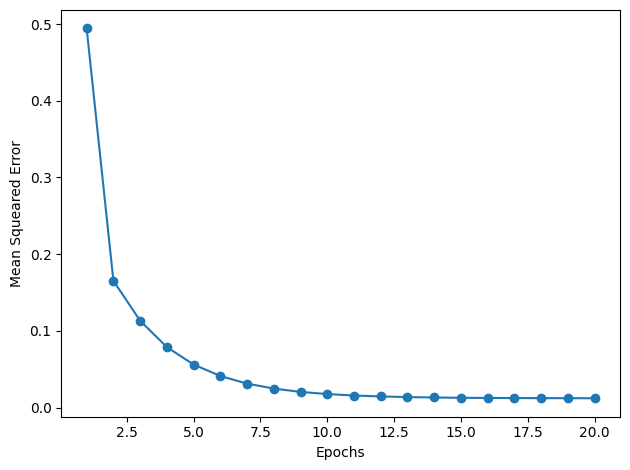

In [47]:
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squeared Error')
plt.tight_layout();

In [55]:
class AdalineSGD:
    """ADAptive LInear NEuron classfier
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    suffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles
    random_state: int
        Ramdon number generator seed for random weight
        initialization

    Attributes
    ----------
    w_ :1d-array
        Weights after fitting
    b_ : Scalar 
        Bias unit after fitting

    losses_ : list
        Mean squared generator loss function values in each epoch
    """
    def __init__(self, eta=0.01, n_inter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_inter = n_inter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and n_features is the numbers of 
            features
        y : array- like, shape = [n_examples]
            Target values

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []

        for i in range(self.n_inter):
            if self.shuffle:
                X, y = self._suffle(X, y)
                losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self


    def partial_fit(self, X, y):
        """Fit trainning data without reinitializing the weights """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(xi, target)
        return self

    def _suffle(self, X, y):
        """"Shuffle trainning data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to smalls random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        
        self.b_ = np.float64(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = ( target - output )
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def activation(self, X):
        """Computet linear activation"""
        return X
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1,0)

In [58]:
ada_sgd = AdalineSGD(n_inter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

[0 1]


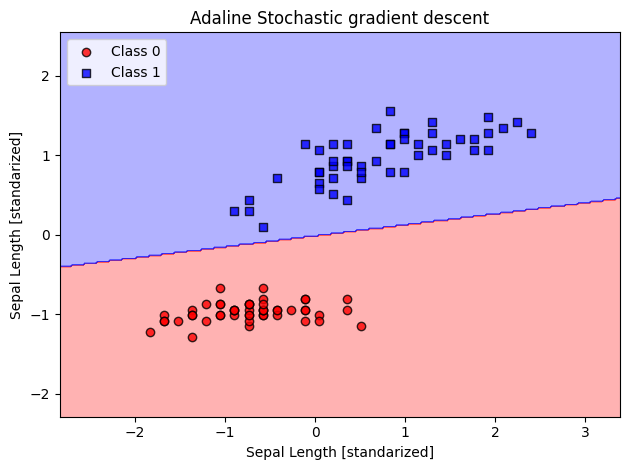

In [59]:
plot_desicion_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline Stochastic gradient descent')
plt.xlabel('Sepal Length [standarized]')
plt.ylabel('Sepal Length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout();

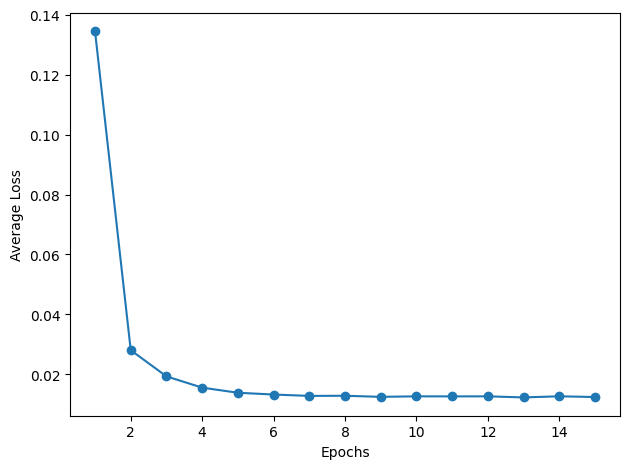

In [60]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.tight_layout();